In [78]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

### Loading data

In [2]:
hR=pd.read_csv("data/open/hR.csv")
mR=pd.read_csv("data/open/mR.csv")
lR=pd.read_csv("data/open/lR.csv")
cond=pd.read_csv("data/open/cond.csv")
risk=pd.read_csv("data/open/risk.csv")
condRisk=pd.read_csv("data/open/condRisk.csv")
TH=pd.read_csv('data/open/hT.csv')

### Functions

In [3]:
def clean_data(df):
    df=df.sample(1000)
    # Deleting columns
    df = df.drop(columns="MDS")
    df = df.drop(columns='Categories')
    return df

In [4]:
def distance(d1,d2):
    #empty list for the biiiig final result after all the loops
    result = []
    #empty list for the distances of all the positions
    resultij=[]
    for i in range(0,len(d1)):
        for j in range(0,len(d2)):
            #euclidean distance between the position i vs all the positions j of d2. This loop works until it finishes
            #_looping_ over the length of d2. np.linalg.norm is an algorithm for the euclidian distance, and substract the
            #values xyz of the position j of d2 of the values of the position i the d1
            dist=np.linalg.norm(d1.iloc[i]-d2.iloc[j])
        
            #every result of this algorith gets into resultij with the .append()
            resultij.append(dist)
        
            #Here, we'll need to sort the values to get the 10 minimum distances between our point cSS[i] and the whole hSS.
            #However, as we need to know also which points are those distances of, we get the index or position of that value.
            #So, it sorts the list of results, and, for a range of the length of this list, it gives us the position of the
            #ten minimum values.
            resultij_index=sorted(range(len(resultij)), key=lambda i: resultij[i])[:10]
            finalij=[]
            #This final loop create a list (the recopilation of distances and j position for a i position) 
            #of lists (the distance, the i position, the j position)
            for item in resultij_index:
                finalij.append([resultij[item],i,item])
        #This last resultij is because we dont want to acumulate EVERYTHING, only the things needed. So we empty it
        #as soon as we use it in the previous for
        resultij=[]
        #and this last append makes a list of lists (the recopilation of distances and j position for a i position)
        #of lists (the distance, the i position, the j position) for the entire dataframe or sample     
        result.append(finalij)
    return result

In [5]:
def only_distance(df):
    l1=df.applymap(lambda x: x[0])
    return l1

### Applying functions and organyzing data

For the risk zones and the 230kv cable.

In [6]:
hS = clean_data(hR)
cS = clean_data(cond)
mS = clean_data(mR)
lS = clean_data(lR)

In [7]:
d_H=distance(hS,cS)
d_M=distance(mS,cS)
d_L=distance(lS,cS)

In [8]:
dH=pd.DataFrame(d_H)
dM=pd.DataFrame(d_M)
dL=pd.DataFrame(d_L)
####################
hh=dH.transpose()
mm=dH.transpose()
ll=dH.transpose()
####################
HDD=only_distance(dH)
MDD=only_distance(dM)
LDD=only_distance(dL)
####################
HD=HDD.transpose()
MD=MDD.transpose()
LD=LDD.transpose()

In [9]:
hh.to_csv(r'data/analysis/HDistance_Points.csv', index=False)
mm.to_csv(r'data/analysis/MDistance_Points.csv', index=False)
ll.to_csv(r'data/analysis/LDistance_Points.csv', index=False)
HD.to_csv(r'data/analysis/HD.csv', index=False)
MD.to_csv(r'data/analysis/MD.csv', index=False)
LD.to_csv(r'data/analysis/LD.csv', index=False)

For the higher than 10m trees and 230kv line.

In [10]:
#Last resources of holding on the dead dream of making a clustering using DBSCAN
th=clean_data(TH)
tth=distance(th,cS)
tthh=pd.DataFrame(tth)
tt=tthh.transpose()
tt.to_csv(r'data/analysis/TDistance_Points.csv', index=False)
tDD=only_distance(tthh)
tD=tDD.transpose()
tD.to_csv(r'data/analysis/TD.csv', index=False)

AttributeError: 'function' object has no attribute 'to_csv'

### Just in case, uploading them again so we don't have to wait everytime .distance() does its thing.

In [ ]:
dH=pd.read_csv("data/analysis/HDistance_Point.csv")
dM=pd.read_csv("data/analysis/MDistance_Point.csv")
dL=pd.read_csv("data/analysis/LDistance_Point.csv")
dT=pd.read_csv("data/analysis/TDistance_Points.csv")
HD=pd.read_csv("data/analysis/HD.csv")
MD=pd.read_csv("data/analysis/MD.csv")
LD=pd.read_csv("data/analysis/LD.csv")
tD=pd.read_csv('data/analysis/TD.csv')

### Some plotting

In [38]:
mH=HD.mean()
mM=MD.mean()
mL=LD.mean()
mT=tD.mean()

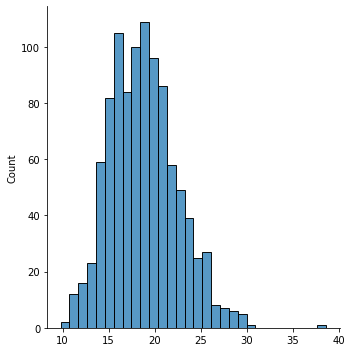

In [84]:
import seaborn as sns
sns.displot(mL)

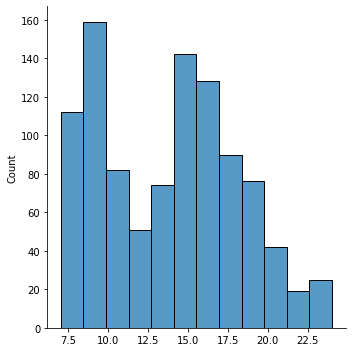

In [86]:
sns.displot(mH)

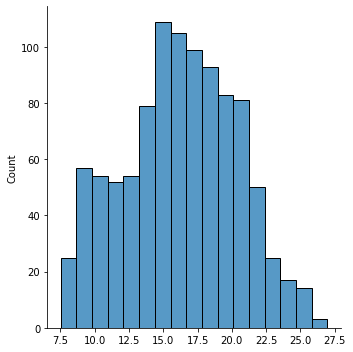

In [85]:
sns.displot(mM)

In [40]:
x_data = ['Smaller Distances for High Risk', 'Smaller Distances for Medium Risk',
          'Smaller Distances for Low Risk']

y_data = [mH, mM, mL]

colors = ['rgba(0, 153, 255, 0.5)', 'rgba(100, 48, 135, 0.5)', 'rgba(254, 80, 0, 0.5)']

fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            #fillcolor=cls,
            marker_size=2,
            line_width=1)
        )

fig.update_layout(
    autosize=False,
    #width=500,
    #height=1000,
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
     margin=dict(
         l=40,
         r=30,
         b=80,
         t=100,
     ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig.show()

In [41]:
meanH=round(mH.mean(),3)
meanM=round(mM.mean(),3)
meanL=round(mL.mean(),3)

In [43]:
print(meanH,meanM,meanL)

13.875 16.204 18.785
